# Linear Regression with TensorFlow

Table of contents:

- [Linear Regression Model](#linear-regression-model)
- [Gradient Descent](#gradient-descent)
- [Building a Linear Regression Model with TensorFlow](#building-a-linear-regression-model-with-tensorflow)
  - [Importing the dataset](#importing-the-dataset)
  - [Prepare the dataset for modeling](#prepare-the-dataset-for-modeling)
  - [The Regression Model](#the-regression-model)
  - [Plot model statistics](#plot-model-statistics)

Linear regression is used to predict real-valued outputs. It is a parametric model and assumes a linear dependence/ relationship between the variables of the dataset.

<div style="display: inline-block;width: 100%;">
<img src="ieee-ompi/LinReg-1.png" style="float:left;" alt="Dataset with real-valued outputs." height=40% width=40% />
</div>

<a id="linear-regression-model"></a>

## Linear Regression Model
In a linear regression model, every variable (or feature vector) is assigned a specific weight (or parameter). We say that a weight parameterizes each feature in the dataset. The weights (or parameters) in the dataset are adjusted to find the optimal value (or constant) that scales the features to optimally approximate the values of the target (or output variable). The linear regression hypothesis is formally represented as:

$$h_{\theta}(x)=\theta_0+\theta_1 x_1+\theta_2 x_2+...+\theta_n x_n$$

To illustrate, the image below is a plot of the first feature and the target variable . We are plotting just one feature against the output variable because it is easier to visualize using a 2-D scatter plot.

<div style="display: inline-block;width: 100%;">
<img src="ieee-ompi/linear-scatter.png" style="float:left;" alt="Linear regression scatter plot." height=50% width=50% />
</div>

<span style="color:blue; font-weight:bold">The goal of the linear model:</span> is to find a line (or hyper-plane) that gives the best approximation or the best fit to the data points. In other words, we want to find a value for the weights $\theta_0$ and $\theta_1$ so that our hypothesis $h_{\theta}(x)$ is close to the target, $y$ for the example set. Hence the cost function can be defined as:

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation}



When found, that line will look like the blue line in the image below.
<div style="display: inline-block;width: 100%;">
<img src="ieee-ompi/linear-scatter-regression.png" style="float:left;" alt="Scatter plot with the regression line." height=50% width=50% />
</div>

<a id="gradient-descent"></a>

## Gradient Descent
Gradient descent is an optimization algorithm that is used to minimize the cost function. Gradient descent attempts to find an approximate solution or the global minimum of the function space by moving iteratively in step along the path of steepest descent until a terminating condition is reached that stops the loop or the algorithm converges. It is expressed as:

\begin{equation}
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
\end{equation}

where,
- $\theta$: is the parameter of the model
- $\alpha$: is the learning rate, which controls the step-size of the gradient update

An illusration of Gradient descent finding the global minimum of a convex function is shown below:
<div style="display: inline-block;width: 100%;">
<img src="ieee-ompi/contour-figure-gradient-descentb.png" style="float:left;" alt="Gradient Descent." height=50% width=50% />
</div>

<a id="building-a-linear-regression-model-with-tensorflow"></a>

## Building a Linear Regression Model with TensorFlow

In [16]:
# import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<a id="importing-the-dataset"></a>

### Importing the dataset
The dataset used in this example is from the [Challenger USA Space Shuttle O-Ring Data Set* from the UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring). The dataset contains 23 observations and 5 variables named:
- Number of O-rings at risk on a given flight 
- Number experiencing thermal distress 
- Launch temperature (degrees F)
- Leak-check pressure (psi)
- Temporal order of flight

The task is to predict the number of O-rings that will experience thermal distress for a given flight when the launch temperature is below freezing.

In [2]:
# import dataset
data = np.loadtxt("data/space-shuttle/o-ring-erosion-or-blowby.data")

In [3]:
# preview data
data[:10,:]

array([[  6.,   0.,  66.,  50.,   1.],
       [  6.,   1.,  70.,  50.,   2.],
       [  6.,   0.,  69.,  50.,   3.],
       [  6.,   0.,  68.,  50.,   4.],
       [  6.,   0.,  67.,  50.,   5.],
       [  6.,   0.,  72.,  50.,   6.],
       [  6.,   0.,  73., 100.,   7.],
       [  6.,   0.,  70., 100.,   8.],
       [  6.,   1.,  57., 200.,   9.],
       [  6.,   1.,  63., 200.,  10.]])

In [4]:
# number of rows and columns
data.shape

(23, 5)

<a id="prepare-the-dataset-for-modeling"></a>

### Prepare the dataset for modeling

In [5]:
# separate features and target
X = data[:,1:]
y = data[:,0]

In [6]:
# sample of features
X[:10,:]

array([[  0.,  66.,  50.,   1.],
       [  1.,  70.,  50.,   2.],
       [  0.,  69.,  50.,   3.],
       [  0.,  68.,  50.,   4.],
       [  0.,  67.,  50.,   5.],
       [  0.,  72.,  50.,   6.],
       [  0.,  73., 100.,   7.],
       [  0.,  70., 100.,   8.],
       [  1.,  57., 200.,   9.],
       [  1.,  63., 200.,  10.]])

In [7]:
# targets
y[:10]

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

In [8]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.15)

In [9]:
# standardize the dataset
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [10]:
# preview standardized feature matrix
X_train[:10,:]

array([[ 1.2070197 , -0.10715528,  0.83510858, -0.05345848],
       [-0.55708601,  1.3735359 ,  0.83510858,  0.09164311],
       [-0.55708601, -0.66241448, -1.32858183, -0.92406806],
       [-0.55708601, -0.29224168, -1.32858183, -1.21427126],
       [-0.55708601,  1.9287951 ,  0.83510858,  0.96225269],
       [ 1.2070197 , -0.10715528, -1.32858183, -1.35937285],
       [-0.55708601,  0.44810391, -0.60735169, -0.63386487],
       [-0.55708601, -0.10715528, -0.60735169, -0.48876327],
       [-0.55708601,  0.26301751, -1.32858183, -0.77896647],
       [-0.55708601, -0.66241448,  0.83510858,  0.23674471]])

<a id="the-regression-model"></a>

### The Regression Model

#### Build the Computational Graph

In [100]:
# parameters
learning_rate = 0.01
training_epochs = 30

In [89]:
# reshape targets to become column vector
y_train = np.reshape(y_train, [-1, 1])
y_test = np.reshape(y_test, [-1, 1])

In [101]:
# data placeholders
X = tf.placeholder(shape=[None, X_train.shape[1]], dtype=tf.float64) 
y = tf.placeholder(shape=[None, 1], dtype=tf.float64) 

In [102]:
# weight
W = tf.Variable(tf.random.normal(shape=[4,1], dtype=tf.float64))
# bias term
b = tf.Variable(tf.random.normal(shape=[1,1], dtype=tf.float64))

In [103]:
# hypothesis
h_theta = tf.add(b, tf.matmul(X_train, W))

In [104]:
# cost function
cost = tf.reduce_mean(tf.square(h_theta - y_train))

In [105]:
# evalution metric - rmse
rmse = tf.metrics.root_mean_squared_error(labels = y_train, predictions = h_theta)

In [106]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [117]:
# initialize global variables
init = [tf.global_variables_initializer(),
        tf.local_variables_initializer()]

#### Execute the Session

In [123]:
# execute tf Session 
with tf.Session() as sess: 
    # initializing the variables 
    sess.run(init) 
    
    # capture statistics for plotting
    plot_stats = {'epoch': [], 'train_cost': [], 'test_cost': []}
    
    # iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # feed each data point into the optimizer using the feed dictionary
        for (x_i, y_i) in zip(X_train, y_train):
            x_i = np.reshape(x_i, [-1,1]).T
            y_i = np.reshape(y_i, [-1,1]).T
            sess.run(optimizer, feed_dict = {X: x_i, y: y_i})
          
        # display the result after 10 epochs 
        if (epoch + 1) % 10 == 0:
            # calculate the cost 
            c_train = sess.run(cost, feed_dict = {X: X_train, y: y_train})
            c_test = sess.run(cost, feed_dict = {X: X_test, y: y_test})
            print("Epoch", (epoch + 1), ": cost =", c_train, "W =", sess.run(W),
                  "b =", sess.run(b)) 
            print("rmse =", sess.run(rmse)[1])
            
            # collect stats
            plot_stats['epoch'].append((epoch + 1))
            plot_stats['train_cost'].append(c_train)
            plot_stats['test_cost'].append(c_test)
      
    # final values after training
    training_cost = sess.run(cost, feed_dict ={X: X_train, y: y_train}) 
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 10 : cost = 0.025435065128297952 W = [[-0.04074439]
 [-0.04880608]
 [ 0.1140739 ]
 [-0.07860312]] b = [[5.85910746]]
rmse = 0.15948375
Epoch 20 : cost = 0.0009101336501019428 W = [[-0.00395135]
 [-0.00249376]
 [ 0.05846888]
 [-0.05557776]] b = [[5.99696721]]
rmse = 0.11477195
Epoch 30 : cost = 0.00031322249123275493 W = [[ 9.59326330e-05]
 [ 9.28610921e-04]
 [ 3.40732638e-02]
 [-3.42440470e-02]] b = [[5.99993472]]
rmse = 0.094266325


<a id="plot-model-statistics"></a>

### Plot model statistics

In [125]:
# import plotting library
import matplotlib.pyplot as plt

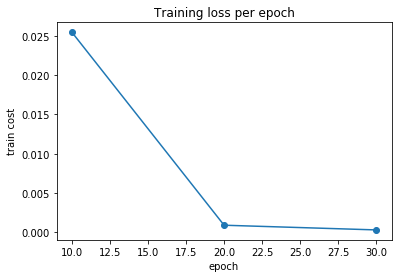

In [153]:
plt.plot(plot_stats['epoch'], plot_stats['train_cost'], 'o-')
plt.xlabel('epoch')
plt.ylabel('train cost')
plt.title('Training loss per epoch')
plt.show()

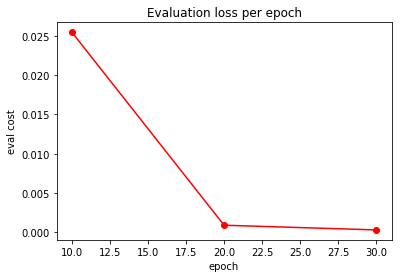

In [150]:
plt.plot(plot_stats['epoch'], plot_stats['test_cost'], 'ro-')
plt.xlabel('epoch')
plt.ylabel('eval cost')
plt.title('Evaluation loss per epoch')
plt.show()